In [1]:
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_d = pd.read_csv('/content/drive/MyDrive/2023-1A-T05/GRUPOS/Grupo 4 - G4/Datasets/tabelas/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.csv')
df_h = pd.read_csv('/content/drive/MyDrive/2023-1A-T05/GRUPOS/Grupo 4 - G4/Datasets/tabelas/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv')
df_p = pd.read_csv('/content/drive/MyDrive/2023-1A-T05/GRUPOS/Grupo 4 - G4/Datasets/tabelas/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv')
df_t = pd.read_csv('/content/drive/MyDrive/2023-1A-T05/GRUPOS/Grupo 4 - G4/Datasets/tabelas/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.csv')

# Exploração dos Dados

## Funções Utilitárias
Funções que tem o objetivo de facilitar a exploração de dados

In [4]:
def replace_arr(base_str, values_to_replace, replace_str):
  for value in values_to_replace:
    base_str = base_str.replace(value, replace_str)
  return base_str

def normalize_columns_name(df):
  columns = []
  for column in df.columns:
    column = column.lower().strip()
    column = replace_arr(column, [
        '?', '(', ')', '!', 'º', '[', ']', '%', '>', '<', ':', ',', ';', '.', '#', '/' 
    ], '')
    column = replace_arr(column, [
        'á', 'à', 'â', 'ã',
    ], 'a')
    column = replace_arr(column, [
        'é', 'è', 'ê',
    ], 'e')
    column = replace_arr(column, [
        'í', 'ì',
    ], 'i')
    column = replace_arr(column, [
        'ó', 'ò', 'ô', 'õ'
    ], 'o')
    column = replace_arr(column, [
        'ú', 'ù', 'û'
    ], 'u')
    column = replace_arr(column, [
        '-', ' ', '=', ',', '__', '__'
    ], '_')
    column = replace_arr(column, [
        'ç'
    ], 'c')

    if column[-1] == '_':
      column = column[:-1]

    if column[0] == '_':
      column = column[1:]
    
    columns.append(column)

  df.columns = columns
  return df

def alterar_tipo_da_coluna(df, column, column_type):
  df[column] = df[column].astype(column_type)

def column_as_numeric(column):
  return pd.to_numeric(column, errors='coerce').fillna(0)

def get_info(df):
  df = df.loc[:]
  col_info = []
    
  for col in df.columns:
    column = df[col]
    null_count = column.isnull().sum()
    null_percent = round((null_count / len(df)) * 100, 2)
    col_dict = {
        'nome': col,
        'tipo': column.dtype,
        'quantidade_nulos': null_count,
        'porcentagem_nulos': null_percent,
        'quantidade_preenchido': column.count(),
        'porcentagem_preenchido': (column.count() / len(df)) * 100,
        'quantidade_valores_distintos': column.nunique(),
        'min': column_as_numeric(column).min(),
        'max': column_as_numeric(column).max(),
        'media': column_as_numeric(column).mean(),
        'mediana': column_as_numeric(column).median()
    }
    col_info.append(col_dict)
    
  col_info_df = pd.DataFrame(col_info)

  alterar_tipo_da_coluna(col_info_df, 'porcentagem_nulos', 'float16')
  alterar_tipo_da_coluna(col_info_df, 'porcentagem_preenchido', 'float16')
    
  return col_info_df

def value_counts_buffado(df, dropna=False):
  for column in df.columns:
    counts = df[column].value_counts(dropna=dropna)
    percs = df[column].value_counts(normalize=True, dropna=dropna).mul(100)
    print('\n' + column + '\n\n', pd.concat([counts,percs], axis=1, keys=['count', 'percentage']))

## Demográficos
Dados gerais dos paciente.

df_f

In [5]:
normalize_columns_name(df_d)
df_d = df_d.rename(columns={
  'tempo_de_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_de_tumores_multiplos_dt_pci': 'dias_desde_ultimo_tumor_ctm_dt_pci',
  'historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_sim_1_grau_apenas_1_caso': 'hered_mama_ovario_grau_1_1_caso',
  'historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_sim_1_grau_mais_de_1_caso': 'hered_mama_ovario_grau_1_n_caso',
  'historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_sim_2_grau_apenas_1_caso': 'hered_mama_ovario_grau_2_1_caso',
  'historia_familiar_de_cancer_relacionado_a_sindrome_de_cancer_de_mama_e_ovario_hereditaria_choice_sim_2_grau_apenas_1_caso': 'hered_mama_ovario_grau_2_n_caso',
  'grau_de_parentesco_de_familiar_com_cancer_choice_primeiro_pais_irmaos_filhos': 'cancer_1_grau_parent',
  'grau_de_parentesco_de_familiar_com_cancer_choice_segundo_avos_tios_e_netos': 'cancer_2_grau_parent',
  'grau_de_parentesco_de_familiar_com_cancer_choice_terceiro_bisavos_tio_avos_primos_sobrinhos': 'cancer_3_grau_parent',
  'idade_do_paciente_ao_primeiro_diagnostico': 'idade_primeiro_diagnostico'
})

get_info(df_d)

,nome,tipo,quantidade_nulos,porcentagem_nulos,quantidade_preenchido,porcentagem_preenchido,quantidade_valores_distintos,min,max,media,mediana
0,record_id,int64,0,0.000000,4272,100.000000,4272,302.0,82240.0,48652.360487,53394.0
1,repeat_instrument,float64,4272,100.000000,0,0.000000,0,0.0,0.0,0.000000,0.0
2,repeat_instance,float64,4272,100.000000,0,0.000000,0,0.0,0.0,0.000000,0.0
3,escolaridade,object,215,5.031250,4057,94.937500,6,0.0,0.0,0.000000,0.0
4,idade_primeiro_diagnostico,float64,180,4.210938,4092,95.812500,76,0.0,98.0,51.962079,53.0
5,sexo,object,147,3.439453,4125,96.562500,2,0.0,0.0,0.000000,0.0
6,raca_declarada_biobanco,object,4038,94.500000,234,5.476562,5,0.0,0.0,0.000000,0.0
7,uf_de_nascimento_do_paciente,object,4270,99.937500,2,0.046814,1,0.0,0.0,0.000000,0.0
8,uf_de_residencia_do_paciente,object,4270,99.937500,2,0.046814,1,0.0,0.0,0.000000,0.0
9,data_da_ultima_informacao_sobre_o_paciente,object,2,0.049988,4270,99.937500,2131,0.0,0.0,0.000000,0.0


In [6]:
value_counts_buffado(df_d)


record_id

        count  percentage
302        1    0.023408
60912      1    0.023408
60757      1    0.023408
60774      1    0.023408
60777      1    0.023408
...      ...         ...
37719      1    0.023408
37723      1    0.023408
37725      1    0.023408
37750      1    0.023408
82240      1    0.023408

[4272 rows x 2 columns]

repeat_instrument

      count  percentage
NaN   4272       100.0

repeat_instance

      count  percentage
NaN   4272       100.0

escolaridade

                              count  percentage
IGNORADA                      2535   59.339888
ENSINO MÉDIO                   488   11.423221
ENS. FUNDAMENTAL INCOMPLETO    445   10.416667
ENS. FUNDAMENTAL COMPLETO      357    8.356742
NaN                            215    5.032772
SUPERIOR                       174    4.073034
ANALFABETO                      58    1.357678

idade_primeiro_diagnostico

       count  percentage
NaN     180    4.213483
50.0    122    2.855805
55.0    121    2.832397
47.0    121 

In [7]:
df_d

,record_id,repeat_instrument,repeat_instance,escolaridade,idade_primeiro_diagnostico,sexo,raca_declarada_biobanco,uf_de_nascimento_do_paciente,uf_de_residencia_do_paciente,data_da_ultima_informacao_sobre_o_paciente,...,cancer_3_grau_parent,regime_de_tratamento,hormonioterapia,data_da_cirurgia,tipo_de_terapia_anti_her2_neoadjuvante,radioterapia,data_de_inicio_do_tratamento_quimioterapia,esquema_de_hormonioterapia,data_do_inicio_hormonioterapia_adjuvante,data_de_inicio_da_radioterapia
0,302,NaN,NaN,ENS. FUNDAMENTAL INCOMPLETO,51.0,Feminino,NaN,NaN,NaN,2014-04-26,...,Unchecked,NaN,NaN,NaN,Trastuzumabe,NaN,NaN,Inibidor de aromatase isolado,NaN,NaN
1,710,NaN,NaN,ENSINO MÉDIO,58.0,Feminino,NaN,NaN,NaN,2016-11-17,...,Unchecked,Terapia Adjuvante,NaN,2009-09-04,NaN,NaN,2014-08-24,NaN,NaN,NaN
2,752,NaN,NaN,ENS. FUNDAMENTAL INCOMPLETO,56.0,Feminino,NaN,NaN,NaN,2019-05-02,...,Unchecked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1367,NaN,NaN,ENS. FUNDAMENTAL INCOMPLETO,63.0,Feminino,NaN,NaN,NaN,2011-09-29,...,Unchecked,NaN,NaN,2011-07-05,NaN,NaN,NaN,NaN,NaN,NaN
4,1589,NaN,NaN,ENS. FUNDAMENTAL COMPLETO,42.0,Feminino,NaN,NaN,NaN,2017-05-24,...,Unchecked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,82123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-25,...,Unchecked,Terapia Neoadjuvante,NaN,2021-07-04,Trastuzumabe,Sim,2020-12-14,NaN,NaN,2021-10-03
4268,82124,NaN,NaN,NaN,41.0,NaN,NaN,NaN,NaN,2021-01-21,...,Unchecked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4269,82131,NaN,NaN,ENSINO MÉDIO,59.0,Feminino,NaN,NaN,NaN,2022-06-10,...,Unchecked,NaN,NaN,2020-12-23,NaN,Sim,NaN,NaN,NaN,2021-04-10
4270,82205,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,2022-04-29,...,Unchecked,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,2022-02-22


## Histopatologia
Dados relacionados a exames de histopalogia, ou seja, informações clínicas relacionadas ao tumor encontrado

- Tem Linhas vazias

df_h

In [8]:
normalize_columns_name(df_h)
df_h = df_h.rename(columns={
  'receptor_de_progesterona_quantificacao': 'progesterona_qtd',
  'receptorde_estrogenio_quantificacao': 'estrogenio_qtd',
  'ki67': 'ki67_qtd',
})

print(df_h.shape)
get_info(df_h)

(9066, 15)


,nome,tipo,quantidade_nulos,porcentagem_nulos,quantidade_preenchido,porcentagem_preenchido,quantidade_valores_distintos,min,max,media,mediana
0,record_id,int64,0,0.00000,9066,100.000000,4272,302.0,82240.0,48865.548754,53990.0
1,repeat_instrument,object,4272,47.12500,4794,52.875000,1,0.0,0.0,0.000000,0.0
2,repeat_instance,float64,4272,47.12500,4794,52.875000,17,0.0,17.0,0.600596,1.0
3,diagnostico_primario_tipo_histologico,object,6112,67.43750,2954,32.593750,18,0.0,0.0,0.000000,0.0
4,grau_histologico,float64,7599,83.81250,1467,16.187500,3,0.0,3.0,0.365211,0.0
5,subtipo_tumoral,float64,4371,48.21875,4695,51.781250,5,0.0,5.0,1.531877,1.0
6,receptor_de_estrogenio,object,4817,53.12500,4249,46.875000,3,0.0,0.0,0.000000,0.0
7,receptor_de_progesterona,object,4815,53.12500,4251,46.875000,4,0.0,0.0,0.000000,0.0
8,ki67_14,object,5044,55.62500,4022,44.375000,4,0.0,0.0,0.000000,0.0
9,progesterona_qtd,object,7176,79.12500,1890,20.843750,43,0.0,100.0,12.423009,0.0


In [9]:
value_counts_buffado(df_h)


record_id

        count  percentage
29800     18    0.198544
67971      4    0.044121
15976      4    0.044121
23205      4    0.044121
62501      4    0.044121
...      ...         ...
38258      2    0.022060
38272      2    0.022060
38277      2    0.022060
38282      2    0.022060
82240      2    0.022060

[4272 rows x 2 columns]

repeat_instrument

                              count  percentage
Dados Histopatologicos Mama   4794   52.878888
NaN                           4272   47.121112

repeat_instance

       count  percentage
NaN    4272   47.121112
1.0    4271   47.110082
2.0     500    5.515111
3.0       9    0.099272
11.0      1    0.011030
16.0      1    0.011030
15.0      1    0.011030
14.0      1    0.011030
13.0      1    0.011030
12.0      1    0.011030
9.0       1    0.011030
10.0      1    0.011030
8.0       1    0.011030
7.0       1    0.011030
6.0       1    0.011030
5.0       1    0.011030
4.0       1    0.011030
17.0      1    0.011030

diagnostico_primario_tip

In [10]:
df_h

,record_id,repeat_instrument,repeat_instance,diagnostico_primario_tipo_histologico,grau_histologico,subtipo_tumoral,receptor_de_estrogenio,receptor_de_progesterona,ki67_14,progesterona_qtd,estrogenio_qtd,indice_h_receptorde_progesterona,her2_por_ihc,her2_por_fish,ki67_qtd
0,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,302,Dados Histopatologicos Mama,1.0,NaN,NaN,5.0,positivo,positivo,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
2,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,710,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,20.0
4,752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,82131,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,positivo,NaN,NaN,NaN,+++ (positivo),NaN,50.0
9062,82205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9063,82205,Dados Histopatologicos Mama,1.0,NaN,NaN,4.0,negativo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,90.0
9064,82240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Análises

#### Métricas de grau_histologico para ki67, progesterona e estrogenio

In [11]:
dftest = df_h.loc[:, ['grau_histologico', 'ki67_qtd', 'progesterona_qtd', 'estrogenio_qtd']]
dftest['ki67_qtd'] = pd.to_numeric(dftest['ki67_qtd'], errors='coerce')
dftest['progesterona_qtd'] = pd.to_numeric(dftest['progesterona_qtd'], errors='coerce')
dftest['estrogenio_qtd'] = pd.to_numeric(dftest['estrogenio_qtd'], errors='coerce')
dftest = dftest.dropna(subset=['grau_histologico', 'ki67_qtd', 'progesterona_qtd', 'estrogenio_qtd'])

dftest1 = dftest.query('grau_histologico == 1')
dftest2 = dftest.query('grau_histologico == 2')
dftest3 = dftest.query('grau_histologico == 3')
px.box(dftest1[['ki67_qtd', 'progesterona_qtd', 'estrogenio_qtd']], title='Grau Histológico 1').show()
px.box(dftest2[['ki67_qtd', 'progesterona_qtd', 'estrogenio_qtd']], title='Grau Histológico 2').show()
px.box(dftest3[['ki67_qtd', 'progesterona_qtd', 'estrogenio_qtd']], title='Grau Histológico 3').show()
# get_info(dftest)

## Peso e Altura
Medições de Peso e Altura feitas durante consultas e outros procedimentos do paciente

df_p

In [12]:
normalize_columns_name(df_p)
get_info(df_p)

,nome,tipo,quantidade_nulos,porcentagem_nulos,quantidade_preenchido,porcentagem_preenchido,quantidade_valores_distintos,min,max,media,mediana
0,record_id,int64,0,0.000000,55654,100.0000,4272,302.0,82240.0,4.553398e+04,50868.0
1,repeat_instrument,object,4272,7.679688,51382,92.3125,1,0.0,0.0,0.000000e+00,0.0
2,repeat_instance,float64,4272,7.679688,51382,92.3125,96,0.0,96.0,1.061597e+01,8.0
3,data,object,4300,7.730469,51354,92.2500,4622,0.0,0.0,0.000000e+00,0.0
4,peso,float64,10476,18.812500,45178,81.1875,1831,0.0,51350.0,5.782807e+01,64.5
5,altura_em_centimetros,float64,5726,10.289062,49928,89.6875,109,0.0,191.0,1.410225e+02,156.0
6,imc,float64,4320,7.761719,51334,92.2500,412,0.0,inf,inf,26.4


In [13]:
value_counts_buffado(df_p)


record_id

        count  percentage
12321     97    0.174291
39366     84    0.150933
30317     81    0.145542
18944     76    0.136558
16927     74    0.132964
...      ...         ...
42499      1    0.001797
74700      1    0.001797
42510      1    0.001797
42534      1    0.001797
20852      1    0.001797

[4272 rows x 2 columns]

repeat_instrument

                        count  percentage
Dados Antropometricos  51382   92.324002
NaN                     4272    7.675998

repeat_instance

       count  percentage
NaN    4272    7.675998
1.0    3741    6.721889
2.0    3512    6.310418
3.0    3343    6.006756
4.0    3205    5.758795
...     ...         ...
88.0      1    0.001797
87.0      1    0.001797
86.0      1    0.001797
84.0      1    0.001797
96.0      1    0.001797

[97 rows x 2 columns]

data

             count  percentage
NaN          4300    7.726309
2017-04-11     42    0.075466
2018-01-22     41    0.073669
2018-03-12     40    0.071873
2017-10-11     39    0.070076


## Tumores
Informações relacionadas a quando um tumor foi encontrado, subtipo, grau, etc

df_t

In [14]:
normalize_columns_name(df_t)
get_info(df_t)

,nome,tipo,quantidade_nulos,porcentagem_nulos,quantidade_preenchido,porcentagem_preenchido,quantidade_valores_distintos,min,max,media,mediana
0,record_id,int64,0,0.00000,8949,100.000000,4272,302.0,82240.0,48698.290535,53478.0
1,repeat_instrument,object,4272,47.75000,4677,52.250000,1,0.0,0.0,0.000000,0.0
2,repeat_instance,float64,4272,47.75000,4677,52.250000,8,0.0,8.0,0.575372,1.0
3,data_da_primeira_consulta_institucional_dt_pci,object,4272,47.75000,4677,52.250000,2561,0.0,0.0,0.000000,0.0
4,data_do_diagnostico,object,4272,47.75000,4677,52.250000,2583,0.0,0.0,0.000000,0.0
5,codigo_da_topografia_cid_o,object,4272,47.75000,4677,52.250000,77,0.0,0.0,0.000000,0.0
6,codigo_da_morfologia_de_acordo_com_o_cid_o,float64,4272,47.75000,4677,52.250000,95,0.0,99873.0,44353.033300,82113.0
7,estadio_clinico,object,4272,47.75000,4677,52.250000,21,0.0,0.0,0.000000,0.0
8,grupo_de_estadio_clinico,object,4534,50.65625,4415,49.343750,7,0.0,0.0,0.000000,0.0
9,classificacao_tnm_clinico_t,object,4272,47.75000,4677,52.250000,23,0.0,4.0,0.756733,0.0


In [15]:
value_counts_buffado(df_t)


record_id

        count  percentage
27364      9    0.100570
19460      7    0.078221
68663      5    0.055872
81834      5    0.055872
34679      5    0.055872
...      ...         ...
38901      2    0.022349
38912      2    0.022349
38971      2    0.022349
39001      2    0.022349
82240      2    0.022349

[4272 rows x 2 columns]

repeat_instrument

                      count  percentage
Registro De Tumores   4677   52.262823
NaN                   4272   47.737177

repeat_instance

      count  percentage
NaN   4272   47.737177
1.0   4272   47.737177
2.0    369    4.123366
3.0     23    0.257012
4.0      5    0.055872
6.0      3    0.033523
5.0      2    0.022349
7.0      2    0.022349
8.0      1    0.011174

data_da_primeira_consulta_institucional_dt_pci

             count  percentage
NaN          4272   47.737177
2017-05-12      8    0.089395
2017-08-18      8    0.089395
2011-08-14      8    0.089395
2016-03-26      8    0.089395
...           ...         ...
2013-08-06     

# Pré Processamento

## Demográficos

In [16]:
#df_d_teste = df_d.copy()

# Filtrando as linhas que correspondem aos valores que estão sendo trocados
#mask = df_d_teste['regime_de_tratamento'].isna()
#date1 = pd.to_datetime(df_d_teste['data_da_cirurgia'], errors='coerce')
#date2 = pd.to_datetime(df_d_teste['data_de_inicio_do_tratamento_quimioterapia'], errors='coerce')
#condition = date1 < date2
#df_trocados = df_d_teste.loc[(mask & condition) | (mask & ~condition), ['data_da_cirurgia', 'data_de_inicio_do_tratamento_quimioterapia']]

# Fazendo a substituição dos valores NaN
#df_d_teste.loc[mask & condition, 'regime_de_tratamento'] = 'Terapia Adjuvante'
#df_d_teste.loc[mask & ~condition, 'regime_de_tratamento'] = 'Terapia Neoadjuvante'

# Imprimindo os valores trocados
#print('Valores trocados:')
#print(df_trocados)

In [17]:
dfd = df_d.loc[:]
dfd = dfd[dfd['regime_de_tratamento'].isin(['Terapia Adjuvante', 'Terapia Neoadjuvante'])]

dfd.loc[dfd['idade_primeiro_diagnostico'].isna(), 'idade_primeiro_diagnostico'] = dfd['idade_primeiro_diagnostico'].mean()


In [18]:
# Criando coluna sobrevida
dfd_sobrevida = dfd

dfd_sobrevida['data_da_cirurgia'] = pd.to_datetime(dfd_sobrevida['data_da_cirurgia'], format='%Y-%m-%d')
dfd_sobrevida['data_da_ultima_informacao_sobre_o_paciente'] = pd.to_datetime(dfd_sobrevida['data_da_ultima_informacao_sobre_o_paciente'], format='%Y-%m-%d')

dfd_sobrevida['sobrevida'] = dfd_sobrevida['data_da_ultima_informacao_sobre_o_paciente'] - dfd_sobrevida['data_da_cirurgia']

dfd_sobrevida['sobrevida'] =dfd_sobrevida['sobrevida'].dt.days / 365.25

dfd['sobrevida'] = dfd_sobrevida['sobrevida']
mean = dfd['sobrevida'].mean()
std = dfd['sobrevida'].std()

random_values = np.random.normal(mean, std, size=dfd['sobrevida'].isna().sum())

# Substitua apenas os valores nulos da coluna 'sobrevida' pelos valores gerados
dfd.loc[dfd['sobrevida'].isna(), 'sobrevida'] = random_values

value_counts_buffado(df_d)
print(dfd.columns)

<ipython-input-18-e47ab5502317>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-e47ab5502317>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-e47ab5502317>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-e47ab55


record_id

        count  percentage
302        1    0.023408
60912      1    0.023408
60757      1    0.023408
60774      1    0.023408
60777      1    0.023408
...      ...         ...
37719      1    0.023408
37723      1    0.023408
37725      1    0.023408
37750      1    0.023408
82240      1    0.023408

[4272 rows x 2 columns]

repeat_instrument

      count  percentage
NaN   4272       100.0

repeat_instance

      count  percentage
NaN   4272       100.0

escolaridade

                              count  percentage
IGNORADA                      2535   59.339888
ENSINO MÉDIO                   488   11.423221
ENS. FUNDAMENTAL INCOMPLETO    445   10.416667
ENS. FUNDAMENTAL COMPLETO      357    8.356742
NaN                            215    5.032772
SUPERIOR                       174    4.073034
ANALFABETO                      58    1.357678

idade_primeiro_diagnostico

       count  percentage
NaN     180    4.213483
50.0    122    2.855805
55.0    121    2.832397
47.0    121 

In [19]:
px.box(dfd['data_da_ultima_informacao_sobre_o_paciente'], title='Sobrevida').show()

In [20]:
px.box(dfd['sobrevida'], title='Sobrevida').show()

In [21]:
df_d_grouped = dfd[['record_id', 'atividade_fisica', 'regime_de_tratamento', 'idade_primeiro_diagnostico', 'sobrevida', 'ultima_informacao_do_paciente']]
df_d_grouped

,record_id,atividade_fisica,regime_de_tratamento,idade_primeiro_diagnostico,sobrevida,ultima_informacao_do_paciente
1,710,NaN,Terapia Adjuvante,58.000000,7.203285,"Vivo, SOE"
5,1705,NaN,Terapia Adjuvante,43.000000,2.058864,Obito por câncer
9,1960,NaN,Terapia Neoadjuvante,29.000000,5.539497,"Vivo, SOE"
15,2157,NaN,Terapia Adjuvante,51.000000,-11.238877,"Vivo, SOE"
26,2864,NaN,Terapia Neoadjuvante,39.000000,4.265572,"Vivo, SOE"
...,...,...,...,...,...,...
4262,82100,NaN,Terapia Neoadjuvante,51.555306,0.177960,"Vivo, SOE"
4264,82112,NaN,Terapia Neoadjuvante,51.555306,0.325804,"Vivo, SOE"
4265,82118,NaN,Terapia Adjuvante,51.555306,0.826831,"Vivo, SOE"
4266,82122,NaN,Terapia Adjuvante,51.555306,4.833968,"Vivo, SOE"


## Histopatologia

In [22]:
dfh = df_h.loc[:]
dfh = dfh.dropna(subset=['diagnostico_primario_tipo_histologico', 'grau_histologico', 'receptor_de_estrogenio', 'receptor_de_progesterona', 'progesterona_qtd', 'estrogenio_qtd', 'indice_h_receptorde_progesterona'], how='all')
dfh = dfh.dropna(subset=['receptor_de_estrogenio', 'receptor_de_progesterona', 'ki67_14',	'progesterona_qtd',	'estrogenio_qtd',	'indice_h_receptorde_progesterona'], how='all')

dfh.loc[((dfh['receptor_de_estrogenio'].isna()) | (dfh['receptor_de_estrogenio'] == 'inconclusivo')) & (dfh['receptor_de_progesterona'] == 'positivo'), 'receptor_de_estrogenio'] = 'positivo'
dfh.loc[((dfh['receptor_de_estrogenio'].isna()) | (dfh['receptor_de_estrogenio'] == 'inconclusivo')) & (dfh['receptor_de_progesterona'] == 'negativo'), 'receptor_de_estrogenio'] = 'negativo'

dfh.loc[((dfh['receptor_de_progesterona'].isna()) | (dfh['receptor_de_progesterona'] == 'inconclusivo')) & (dfh['receptor_de_estrogenio'] == 'positivo'), 'receptor_de_progesterona'] = 'positivo'
dfh.loc[((dfh['receptor_de_progesterona'].isna()) | (dfh['receptor_de_progesterona'] == 'inconclusivo')) & (dfh['receptor_de_estrogenio'] == 'negativo'), 'receptor_de_progesterona'] = 'negativo'

# ESTROGENIO = NEGATIVO - ESTROGENIO QUANTIFICACAO
# As celulas com estrogenio = negativo são células incapazes de receber estrogênio. Portanto, todos os casos em que a quantificação for 'neg' ou 'NEG', troquei por 0
dfh.loc[(dfh['estrogenio_qtd'] == 'neg') & (dfh['receptor_de_estrogenio'] == 'negativo'), 'estrogenio_qtd'] = 0
dfh.loc[(dfh['estrogenio_qtd'] == 'NEG') & (dfh['receptor_de_estrogenio'] == 'negativo'), 'estrogenio_qtd'] = 0

# Os casos onde a quantificação é NaN e o estrogenio é negativo, tratei como 0, que é a imensa maioria dos casos
dfh.loc[(dfh['estrogenio_qtd'].isna()) & (dfh['receptor_de_estrogenio'] == 'negativo'), 'estrogenio_qtd'] = 0

# ESTROGENIO = POSITIVO - ESTROGENIO QUANTIFICACAO
# Os registros estranhos fiz que recebessem a moda (1)
dfh.loc[(dfh['estrogenio_qtd'].isna()) & (dfh['receptor_de_estrogenio'] == 'positivo'), 'estrogenio_qtd'] = 1
dfh.loc[(dfh['estrogenio_qtd'] == '0') & (dfh['receptor_de_estrogenio'] == 'positivo'), 'estrogenio_qtd'] = 1
dfh.loc[(dfh['estrogenio_qtd'] == 'neg') & (dfh['receptor_de_estrogenio'] == 'positivo'), 'estrogenio_qtd'] = 1
# Valor entre 1-10 é a média (5)
dfh.loc[(dfh['estrogenio_qtd'] == '1-10') & (dfh['receptor_de_estrogenio'] == 'positivo'), 'estrogenio_qtd'] = 5

# PROGESTERONA
dfh.loc[(dfh['progesterona_qtd'] == '20-70'), 'progesterona_qtd'] = 45
dfh.loc[(dfh['progesterona_qtd'] == '70%'), 'progesterona_qtd'] = 70
dfh.loc[((dfh['progesterona_qtd'] == 'neg') | (dfh['progesterona_qtd'] == 'NEG') | (dfh['progesterona_qtd'].isna())) & (dfh['receptor_de_progesterona'] == 'negativo'),'progesterona_qtd'] = 0
dfh.loc[((dfh['progesterona_qtd'] == 'neg') | (dfh['progesterona_qtd'] == 'inconclusivo') | (dfh['progesterona_qtd'].isna())) & (dfh['receptor_de_progesterona'] == 'positivo'),'progesterona_qtd'] = 1

dfh = dfh.drop(dfh.loc[dfh['receptor_de_estrogenio'] == 'não realizado'].index)

# ki67 - Preenche NaNs de acordo com a média em 4 grupos considerando as variáveis estrogenio e progesterona (ambos positivo ou negativo)
dfh.loc[(dfh['receptor_de_estrogenio'] == 'positivo') & (dfh['receptor_de_progesterona'] == 'negativo') & (dfh['ki67_qtd'].isna()), 'ki67_qtd'] = dfh[(dfh['receptor_de_estrogenio'] == 'positivo') & (dfh['receptor_de_progesterona'] == 'negativo')]['ki67_qtd'].mean()
dfh.loc[(dfh['receptor_de_estrogenio'] == 'negativo') & (dfh['receptor_de_progesterona'] == 'positivo') & (dfh['ki67_qtd'].isna()), 'ki67_qtd'] = dfh[(dfh['receptor_de_estrogenio'] == 'negativo') & (dfh['receptor_de_progesterona'] == 'positivo')]['ki67_qtd'].mean()
dfh.loc[(dfh['receptor_de_estrogenio'] == 'positivo') & (dfh['receptor_de_progesterona'] == 'positivo') & (dfh['ki67_qtd'].isna()), 'ki67_qtd'] = dfh[(dfh['receptor_de_estrogenio'] == 'positivo') & (dfh['receptor_de_progesterona'] == 'positivo')]['ki67_qtd'].mean()
dfh.loc[(dfh['receptor_de_estrogenio'] == 'negativo') & (dfh['receptor_de_progesterona'] == 'negativo') & (dfh['ki67_qtd'].isna()), 'ki67_qtd'] = dfh[(dfh['receptor_de_estrogenio'] == 'negativo') & (dfh['receptor_de_progesterona'] == 'negativo')]['ki67_qtd'].mean()

dfh['ki67_14'] = dfh['ki67_14'].replace({
    'não realizado': np.nan,
    'inconclusivo': np.nan
})

dfh.loc[(dfh['ki67_14'].isna()) & (dfh['ki67_qtd'] >= 20), 'ki67_14'] = 'positivo'
dfh.loc[dfh['ki67_14'].isna(), 'ki67_14'] = 'negativo'

dfh['estrogenio_qtd'] = dfh['estrogenio_qtd'].astype(float)
dfh['progesterona_qtd'] = dfh['progesterona_qtd'].astype(float)
dfh['ki67_qtd'] = dfh['ki67_qtd'].astype(float)

# Agrupando e pegando o primeiro registro de cada RECORD_ID
dfh = dfh.loc[dfh.groupby('record_id')['repeat_instance'].idxmin()]

# tirando os nulos finais
dfh = dfh[(dfh['subtipo_tumoral'].notna()) & (dfh['her2_por_ihc'].notna())]

# Pegando colunas que serão usadas
df_h_grouped = dfh.loc[:, ['record_id', 'subtipo_tumoral', 'receptor_de_estrogenio', 'estrogenio_qtd', 'receptor_de_progesterona', 'progesterona_qtd', 'ki67_14', 'ki67_qtd', 'her2_por_ihc']]

df_h_grouped


,record_id,subtipo_tumoral,receptor_de_estrogenio,estrogenio_qtd,receptor_de_progesterona,progesterona_qtd,ki67_14,ki67_qtd,her2_por_ihc
1,302,5.0,positivo,1.0,positivo,1.0,positivo,26.998635,+++ (positivo)
3,710,2.0,positivo,1.0,negativo,0.0,positivo,20.000000,0 (negativo)
7,1367,2.0,positivo,60.0,positivo,5.0,positivo,40.000000,0 (negativo)
10,1589,5.0,positivo,1.0,positivo,1.0,positivo,26.998635,+++ (positivo)
12,1705,4.0,negativo,0.0,negativo,0.0,positivo,55.257194,0 (negativo)
...,...,...,...,...,...,...,...,...,...
9033,82077,2.0,positivo,1.0,positivo,1.0,positivo,15.000000,0 (negativo)
9043,82098,2.0,positivo,1.0,positivo,1.0,positivo,15.000000,0 (negativo)
9053,82122,2.0,positivo,80.0,positivo,60.0,positivo,40.000000,++ (duvidoso)
9063,82205,4.0,negativo,0.0,negativo,0.0,positivo,90.000000,0 (negativo)


## Peso e Altura

In [23]:
# Ordena os valores por data
df_p = df_p.sort_values(['record_id', 'data'])

# Substitui zeros para serem tratados como nan
df_p['altura_em_centimetros'] = df_p['altura_em_centimetros'].replace({0: np.nan})
df_p['peso'] = df_p['peso'].replace({0: np.nan})

# Agrupa as linhas em uma só
df_p_2 = df_p.groupby(by='record_id').agg({
    'peso': lambda x: x.iloc[0] if not np.isnan(x.iloc[0]) else x.fillna(0).mean(),
    'altura_em_centimetros': lambda x: x.iloc[0] if not np.isnan(x.iloc[0]) else x.fillna(0).median(),
}).reset_index()

# Tira as linhas com algum 0
df_p_2 = df_p_2[(df_p_2['peso'] != 0) & (df_p_2['altura_em_centimetros'] != 0) & (df_p_2['peso'].notna()) & (df_p_2['altura_em_centimetros'].notna())]

# Calcula o IMC
df_p_2['imc'] = df_p_2['peso'] / ((df_p_2['altura_em_centimetros'] / 100) * (df_p_2['altura_em_centimetros'] / 100))

df_p_grouped = df_p_2.loc[:, ['record_id', 'imc']]

df_p_grouped

,record_id,imc
0,302,23.153341
1,710,25.065746
2,752,36.357341
3,1367,28.314343
4,1589,22.661264
...,...,...
4267,82123,36.481695
4268,82124,35.568615
4269,82131,29.152079
4270,82205,44.870525


## Tumores


In [24]:
# Tirando linhas de NaNs
df_t_2 = df_t.dropna(subset=df_t.columns[1:], how='all')
# Pegando as colunas interessantes
df_t_2 = df_t_2[['record_id', 'repeat_instance', 'estadio_clinico', 'classificacao_tnm_clinico_t', 'classificacao_tnm_clinico_n', 'classificacao_tnm_clinico_m', 'lateralidade_do_tumor', 'com_recidiva_a_distancia', 'com_recidiva_local', 'com_recidiva_regional']].loc[:]


# Agrupando classificação T
df_t_2['classificacao_tnm_clinico_t'] = df_t_2['classificacao_tnm_clinico_t'].replace({
    '1MIC': '1', # 1
    '1A': '1',
    '1B': '1',
    '1C': '1',
    '2A': '2', # 2
    '2B': '2',
    '3A': '3', # 3
    '3B': '3',
    '4C': '4', # 4
    '4A': '4',
    '4B': '4',
    '4D': '4',
    'CDIS': 'IS', # IS
    'CLIS': 'IS'
})

# Transformando A em 0
df_t_2 = df_t_2[~df_t_2['classificacao_tnm_clinico_t'].isin(['A', '0', 'Y: Na', 'X - nao foi possivel determinar'])]

# Agrupando classificação N
df_t_2['classificacao_tnm_clinico_n'] = df_t_2['classificacao_tnm_clinico_n'].replace({
    '1MIC': '1', # 1
    '1A': '1',
    '1B': '1',
    '1C': '1',
    '2A': '2', # 2
    '2B': '2',
    '3A': '3', # 3
    '3B': '3',
    '3C': '3',
    '4C': '4', # 4
    '4A': '4',
    '4B': '4',
    '4D': '4'
})

# Agrupando classificação M
df_t_2['classificacao_tnm_clinico_m'] = df_t_2['classificacao_tnm_clinico_m'].replace({
    '1MIC': '1', # 1
    '1A': '1',
    '1B': '1',
    '1C': '1',
    '2A': '2', # 2
    '2B': '2',
    '3A': '3', # 3
    '3B': '3',
    '3C': '3',
    '4C': '4', # 4
    '4A': '4',
    '4B': '4',
    '4D': '4'
})

# Pegando o primeiro registro de cada record_id
df_t_2 = df_t_2.loc[df_t_2.groupby('record_id')['repeat_instance'].idxmin()]

# Marcando recidivas
df_t_2['recidiva'] = np.nan

df_t_2.loc[(df_t_2['com_recidiva_a_distancia'] == 'Sim') | (df_t_2['com_recidiva_local'] == 'Sim') | (df_t_2['com_recidiva_regional'] == 'Sim'), 'recidiva'] = 'Sim'
df_t_2.loc[(df_t_2['com_recidiva_a_distancia'] == 'Não') & (df_t_2['com_recidiva_local'] == 'Não') & (df_t_2['com_recidiva_regional'] == 'Não'), 'recidiva'] = 'Não'

# Guardando resultado final
df_t_grouped = df_t_2.loc[:, ['record_id', 'estadio_clinico', 'classificacao_tnm_clinico_t', 'classificacao_tnm_clinico_n', 'classificacao_tnm_clinico_m', 'recidiva']]

value_counts_buffado(df_t_grouped)


record_id

        count  percentage
302        1    0.023602
60925      1    0.023602
60777      1    0.023602
60799      1    0.023602
60815      1    0.023602
...      ...         ...
37781      1    0.023602
37792      1    0.023602
37805      1    0.023602
37840      1    0.023602
82240      1    0.023602

[4237 rows x 2 columns]

estadio_clinico

       count  percentage
IIA     911   21.501062
IIIA    721   17.016757
IIB     716   16.898749
IV      524   12.367241
IIIB    460   10.856738
IA      409    9.653056
I       240    5.664385
IIIC    183    4.319094
0        37    0.873259
IB       35    0.826056
II        1    0.023602

classificacao_tnm_clinico_t

     count  percentage
2    1611   38.022186
1     918   21.666273
3     854   20.155771
4     817   19.282511
IS     37    0.873259

classificacao_tnm_clinico_n

                                  count  percentage
0                                 1780   42.010857
1                                 1394   32.900637
2       

## Merge Geral
Juntando tabelas, mesmo que os dados se repitam

In [25]:
df = pd.merge(
    df_t_grouped,
    df_p_grouped,
    on='record_id'
)

df = pd.merge(
    df,
    df_h_grouped,
    on='record_id'
)

df = pd.merge(
  df,
  df_d_grouped,
  on='record_id'
)

df.info()
value_counts_buffado(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2211
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   record_id                      2212 non-null   int64  
 1   estadio_clinico                2212 non-null   object 
 2   classificacao_tnm_clinico_t    2212 non-null   object 
 3   classificacao_tnm_clinico_n    2212 non-null   object 
 4   classificacao_tnm_clinico_m    2212 non-null   object 
 5   recidiva                       2212 non-null   object 
 6   imc                            2212 non-null   float64
 7   subtipo_tumoral                2212 non-null   float64
 8   receptor_de_estrogenio         2212 non-null   object 
 9   estrogenio_qtd                 2212 non-null   float64
 10  receptor_de_progesterona       2212 non-null   object 
 11  progesterona_qtd               2212 non-null   float64
 12  ki67_14                        2212 non-null   o

In [26]:
# Explorando recidiva

df_explorando_recidiva = df
dfd_onehot_regime_tratamento = pd.get_dummies(df_explorando_recidiva['regime_de_tratamento'])
df_explorando_recidiva = pd.concat([df_explorando_recidiva, dfd_onehot_regime_tratamento], axis=1)

dfd_onehot_recidiva = pd.get_dummies(df_explorando_recidiva['recidiva'])
df_explorando_recidiva = pd.concat([df_explorando_recidiva, dfd_onehot_recidiva], axis=1)

df_explorando_recidiva.info()
value_counts_buffado(df_explorando_recidiva)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2211
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   record_id                      2212 non-null   int64  
 1   estadio_clinico                2212 non-null   object 
 2   classificacao_tnm_clinico_t    2212 non-null   object 
 3   classificacao_tnm_clinico_n    2212 non-null   object 
 4   classificacao_tnm_clinico_m    2212 non-null   object 
 5   recidiva                       2212 non-null   object 
 6   imc                            2212 non-null   float64
 7   subtipo_tumoral                2212 non-null   float64
 8   receptor_de_estrogenio         2212 non-null   object 
 9   estrogenio_qtd                 2212 non-null   float64
 10  receptor_de_progesterona       2212 non-null   object 
 11  progesterona_qtd               2212 non-null   float64
 12  ki67_14                        2212 non-null   o

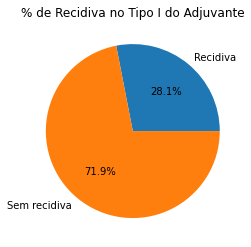

In [27]:
df_explorando_recidiva['Terapia Neoadjuvante'] = df_explorando_recidiva['Terapia Neoadjuvante'].astype(bool)
df_explorando_recidiva['Terapia Adjuvante'] = df_explorando_recidiva['Terapia Adjuvante'].astype(bool)

df_filtered = df_explorando_recidiva[df_explorando_recidiva['Terapia Neoadjuvante'] & (df_explorando_recidiva['subtipo_tumoral'] == 2) & (df_explorando_recidiva['idade_primeiro_diagnostico'] > 0)]

# Calculando a porcentagem de True e False na coluna 'sim'
total = len(df_filtered)
percent_true = (df_filtered['Sim'] == 1).sum() / total * 100
percent_false = (df_filtered['Sim'] == 0).sum() / total * 100

# Gerando o gráfico de pizza com as porcentagens de True e False
plt.pie([percent_true, percent_false], labels=['Recidiva', 'Sem recidiva'], autopct='%1.1f%%')
plt.title('% de Recidiva no Tipo I do Adjuvante')
plt.show()

# Neoadjuvante: % de recidiva por subtipo tumoral acima de 50 anos: 1= 45%, 2= 23,3%, 3= 26,7% e 4=29,2%
# Adjuvante: % de recidiva por subtipo tumoral: 1= 1,9%, 2=10%, 3= 15% e 4=14%


In [28]:
print(df_explorando_recidiva.columns)

Index(['record_id', 'estadio_clinico', 'classificacao_tnm_clinico_t',
       'classificacao_tnm_clinico_n', 'classificacao_tnm_clinico_m',
       'recidiva', 'imc', 'subtipo_tumoral', 'receptor_de_estrogenio',
       'estrogenio_qtd', 'receptor_de_progesterona', 'progesterona_qtd',
       'ki67_14', 'ki67_qtd', 'her2_por_ihc', 'atividade_fisica',
       'regime_de_tratamento', 'idade_primeiro_diagnostico', 'sobrevida',
       'ultima_informacao_do_paciente', 'Terapia Adjuvante',
       'Terapia Neoadjuvante', 'Não', 'Sim'],
      dtype='object')


[ True False]
[False  True]
[2. 4. 3. 1.]


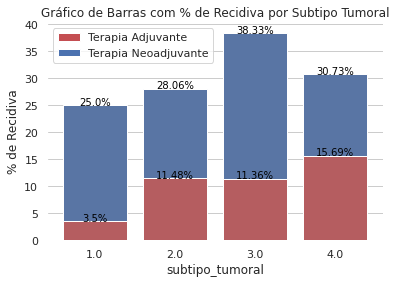

In [29]:
df_explorando_recidiva['subtipo_tumoral'] = df_explorando_recidiva['subtipo_tumoral'].replace(5, 4)

print(df_explorando_recidiva['Terapia Adjuvante'].unique())
print(df_explorando_recidiva['Terapia Neoadjuvante'].unique())
print(df_explorando_recidiva['subtipo_tumoral'].unique())

df_filtered = df_explorando_recidiva

grouped = df_filtered.groupby('subtipo_tumoral')

# Calculando a porcentagem de valores True na coluna 'Sim', para as condições 'Terapia Neoadjuvante' e 'Terapia Adjuvante', em cada grupo da coluna 'subtipo_tumoral'
percent_true_neo = grouped.apply(lambda x: (x['Sim'][x['Terapia Neoadjuvante'] == True].sum() / len(x[x['Terapia Neoadjuvante'] == True])) * 100)
percent_true_adj = grouped.apply(lambda x: (x['Sim'][x['Terapia Adjuvante'] == True].sum() / len(x[x['Terapia Adjuvante'] == True])) * 100)

# Criando um DataFrame com as informações calculadas acima
df_plot = pd.DataFrame({'Terapia Neoadjuvante': percent_true_neo, 'Terapia Adjuvante': percent_true_adj})
df_plot = df_plot.reset_index()

colors = {"Terapia Adjuvante": "r", "Terapia Neoadjuvante": "b"}

# Plotando o gráfico
sns.set(style="whitegrid")
ax = sns.barplot(x="subtipo_tumoral", y="Terapia Neoadjuvante", data=df_plot, color="b")
ax = sns.barplot(x="subtipo_tumoral", y="Terapia Adjuvante", data=df_plot, color="r")
ax.set(ylabel="% de Recidiva", title="Gráfico de Barras com % de Recidiva por Subtipo Tumoral")
sns.despine(left=True, bottom=True)

for t in colors:
    ax.bar(0, 0, color=colors[t], label=t)
ax.legend()

# Adicionando as anotações com as porcentagens no meio de cada coluna
for i in range(len(df_plot)):
    ax.annotate(str(round(df_plot.iloc[i]['Terapia Neoadjuvante'], 2)) + "%", xy=(i, df_plot.iloc[i]['Terapia Neoadjuvante']), fontsize=10, color='black', ha='center', va='baseline')
    ax.annotate(str(round(df_plot.iloc[i]['Terapia Adjuvante'], 2)) + "%", xy=(i, df_plot.iloc[i]['Terapia Adjuvante']), fontsize=10, color='black', ha='center', va='baseline')

plt.show()



### Corrigindo target

In [30]:
df.loc[(df['regime_de_tratamento'] == 'Terapia Adjuvante') & ((df['recidiva'] == 'Sim') | (df['ultima_informacao_do_paciente'] == 'Obito por câncer')), 'regime_de_tratamento'] = 'Terapia Neoadjuvante' # 142
df.loc[(df['regime_de_tratamento'] == 'Terapia Neoadjuvante') & ((df['recidiva'] == 'Sim') | (df['ultima_informacao_do_paciente'] == 'Obito por câncer')), 'regime_de_tratamento'] = 'Terapia Adjuvante' # 317

df = df.drop(columns=['recidiva', 'sobrevida'])
df = df.drop(columns=['ultima_informacao_do_paciente'])

px.bar(df['regime_de_tratamento'].value_counts())

# Normalização

## Divisão de colunas Categóricas e Numéricas

In [31]:
colunas_numericas = ['imc', 'estrogenio_qtd', 'progesterona_qtd', 'ki67_qtd', 'idade_primeiro_diagnostico']
df_numericas = df[colunas_numericas]
df_categoricas = df.drop(columns=[*colunas_numericas, 'record_id'])

## Categóricas

In [32]:
value_counts_buffado(df_categoricas)


estadio_clinico

       count  percentage
IIA     532   24.050633
IIB     485   21.925859
IIIA    460   20.795660
IIIB    284   12.839060
IA      133    6.012658
IV      116    5.244123
IIIC    108    4.882459
I        69    3.119349
IB       20    0.904159
0         5    0.226040

classificacao_tnm_clinico_t

     count  percentage
2     963   43.535262
3     494   22.332731
4     379   17.133816
1     371   16.772152
IS      5    0.226040

classificacao_tnm_clinico_n

    count  percentage
1    860   38.878843
0    831   37.567812
2    390   17.631103
3    131    5.922242

classificacao_tnm_clinico_m

    count  percentage
0   2096   94.755877
1    116    5.244123

subtipo_tumoral

      count  percentage
2.0    788   35.623870
4.0    608   27.486438
5.0    485   21.925859
1.0    183    8.273056
3.0    148    6.690778

receptor_de_estrogenio

           count  percentage
positivo   1434    64.82821
negativo    778    35.17179

receptor_de_progesterona

           count  percentage
p

### Label Encode

In [33]:
value_counts_buffado(df_categoricas)
df_categoricas['classificacao_tnm_clinico_t'] = df_categoricas['classificacao_tnm_clinico_t'].replace({
    'IS': 0
}).astype(int)

df_categoricas['receptor_de_estrogenio'] = df_categoricas['receptor_de_estrogenio'].replace({
    'negativo': 0,
    'positivo': 1
}).astype(int)

df_categoricas['receptor_de_progesterona'] = df_categoricas['receptor_de_progesterona'].replace({
    'negativo': 0,
    'positivo': 1
}).astype(int)

df_categoricas['ki67_14'] = df_categoricas['receptor_de_progesterona'].replace({
    'negativo': 0,
    'positivo': 1
}).astype(int)

df_categoricas['classificacao_tnm_clinico_n'] = df_categoricas['classificacao_tnm_clinico_n'].astype(int)

df_categoricas['classificacao_tnm_clinico_m'] = df_categoricas['classificacao_tnm_clinico_m'].astype(int)

df_categoricas['subtipo_tumoral'] = df_categoricas['subtipo_tumoral'].astype(int)

df_categoricas['regime_de_tratamento'] = df_categoricas['regime_de_tratamento'].replace({
    'Terapia Adjuvante': 0,
    'Terapia Neoadjuvante': 1
}).astype(int)

df_categoricas.loc[df_categoricas['atividade_fisica'].isna(), 'atividade_fisica'] = 0
df_categoricas['atividade_fisica'] = df_categoricas['atividade_fisica'].replace({
    'Não pratica': -1,
    'Pratica esporadicamente': 1,
    'Pratica regularmente': 2,
    'Pratica frequentemente': 3
}).astype(int)

value_counts_buffado(df_categoricas)


estadio_clinico

       count  percentage
IIA     532   24.050633
IIB     485   21.925859
IIIA    460   20.795660
IIIB    284   12.839060
IA      133    6.012658
IV      116    5.244123
IIIC    108    4.882459
I        69    3.119349
IB       20    0.904159
0         5    0.226040

classificacao_tnm_clinico_t

     count  percentage
2     963   43.535262
3     494   22.332731
4     379   17.133816
1     371   16.772152
IS      5    0.226040

classificacao_tnm_clinico_n

    count  percentage
1    860   38.878843
0    831   37.567812
2    390   17.631103
3    131    5.922242

classificacao_tnm_clinico_m

    count  percentage
0   2096   94.755877
1    116    5.244123

subtipo_tumoral

      count  percentage
2.0    788   35.623870
4.0    608   27.486438
5.0    485   21.925859
1.0    183    8.273056
3.0    148    6.690778

receptor_de_estrogenio

           count  percentage
positivo   1434    64.82821
negativo    778    35.17179

receptor_de_progesterona

           count  percentage
p

### One Hot Encode

In [34]:
df_categoricas = pd.concat([df_categoricas, pd.get_dummies(df_categoricas['estadio_clinico'], prefix='est_c_')], axis=1)
df_categoricas = pd.concat([df_categoricas, pd.get_dummies(df_categoricas['her2_por_ihc'], prefix='her2_')], axis=1)


# Removendo colunas desnecessárias
df_categoricas = normalize_columns_name(df_categoricas).drop(columns=['estadio_clinico', 'her2_por_ihc', 'her2_indeterminado'])

value_counts_buffado(df_categoricas)


classificacao_tnm_clinico_t

    count  percentage
2    963   43.535262
3    494   22.332731
4    379   17.133816
1    371   16.772152
0      5    0.226040

classificacao_tnm_clinico_n

    count  percentage
1    860   38.878843
0    831   37.567812
2    390   17.631103
3    131    5.922242

classificacao_tnm_clinico_m

    count  percentage
0   2096   94.755877
1    116    5.244123

subtipo_tumoral

    count  percentage
2    788   35.623870
4    608   27.486438
5    485   21.925859
1    183    8.273056
3    148    6.690778

receptor_de_estrogenio

    count  percentage
1   1434    64.82821
0    778    35.17179

receptor_de_progesterona

    count  percentage
1   1232   55.696203
0    980   44.303797

ki67_14

    count  percentage
1   1232   55.696203
0    980   44.303797

atividade_fisica

     count  percentage
 0   2027   91.636528
-1    141    6.374322
 2     25    1.130199
 1     12    0.542495
 3      7    0.316456

regime_de_tratamento

    count  percentage
0   1532    69.25

In [35]:
# Merge categóricas e numéricas
df = pd.concat([df_categoricas, df_numericas], axis=1)

## Separação dos conjuntos de treino e teste

In [36]:
df_x = df.drop(columns=['regime_de_tratamento'])
df_y = df['regime_de_tratamento']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 1)
X_train

,classificacao_tnm_clinico_t,classificacao_tnm_clinico_n,classificacao_tnm_clinico_m,subtipo_tumoral,receptor_de_estrogenio,receptor_de_progesterona,ki67_14,atividade_fisica,est_c_0,est_c_i,...,est_c_iv,her2_+_negativo,her2_++_duvidoso,her2_+++_positivo,her2_0_negativo,imc,estrogenio_qtd,progesterona_qtd,ki67_qtd,idade_primeiro_diagnostico
321,2,0,0,4,0,0,0,0,0,0,...,0,1,0,0,0,25.964542,0.0,0.0,80.000000,82.0
1004,2,1,0,2,1,1,1,0,0,0,...,0,0,0,0,1,32.189349,95.0,80.0,21.000000,50.0
1663,1,2,0,2,1,0,0,0,0,0,...,0,0,0,0,1,21.592394,1.0,0.0,75.000000,43.0
859,3,2,0,2,1,1,1,0,0,0,...,0,0,0,0,1,26.925465,95.0,80.0,62.000000,44.0
2073,2,0,0,2,1,1,1,0,0,0,...,0,0,0,0,1,40.527557,20.0,10.0,40.000000,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,3,0,0,2,1,1,1,0,0,0,...,0,0,0,0,1,21.544822,80.0,5.0,30.000000,49.0
905,3,1,0,2,1,1,1,0,0,0,...,0,0,0,0,1,35.234375,90.0,95.0,30.000000,50.0
1096,2,0,0,4,0,0,0,0,0,0,...,0,0,0,0,1,20.682612,0.0,0.0,20.000000,68.0
235,2,1,0,4,0,0,0,0,0,0,...,0,0,0,0,1,35.693040,0.0,0.0,55.257194,45.0


## Normalizando Dados Numéricos

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])

X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

X_train[colunas_numericas]

,imc,estrogenio_qtd,progesterona_qtd,ki67_qtd,idade_primeiro_diagnostico
321,0.175063,0.00,0.00,0.800000,0.923077
1004,0.223264,0.95,0.80,0.210000,0.430769
1663,0.141208,0.01,0.00,0.750000,0.323077
859,0.182504,0.95,0.80,0.620000,0.338462
2073,0.287829,0.20,0.10,0.400000,0.600000
...,...,...,...,...,...
960,0.140840,0.80,0.05,0.300000,0.415385
905,0.246842,0.90,0.95,0.300000,0.430769
1096,0.134164,0.00,0.00,0.200000,0.707692
235,0.250394,0.00,0.00,0.552572,0.353846


# Modelos

In [38]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

def print_results(model, X_train, y_train, X_test, y_test):
  y_pred = model.predict(X_test)

  print("Acurácia Treino: " + str(model.score(X_train, y_train)))
  print("Acurácia Teste: " + str(model.score(X_test, y_test)))
  print("Recall Teste: " + str(recall_score(y_test, y_pred)))
  print("Precisao Teste: " + str(precision_score(y_test, y_pred)))

  labels = ['Terapia Adjuvante', 'Terapia Neoadjuvante']
  
  px.imshow(confusion_matrix(y_test, y_pred, labels=[0, 1]), text_auto=True, aspect="auto", labels=dict(x="Valores Preditos", y="Valores Reais", color="Intensidade"), x=labels, y=labels).show()

## KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
def get_best_n_neighbors(X_train, y_train, X_test, y_test, max = 103, printValues=False):
  if max % 2 == 0:
    max+=-1
  
  max_acc = 0
  best_knn = 0

  for i in range(3, max+1, 2):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    score = knn_classifier.score(X_test, y_test)

    if printValues:
      print('k: ' + str(i) + '\nScore: ' + str(score) + '\n\n')

    if(max_acc < score):
      max_acc = score
      best_knn = knn_classifier

  return best_knn

print(X_train.dtypes)
print(y_train.dtypes)

classificacao_tnm_clinico_t      int64
classificacao_tnm_clinico_n      int64
classificacao_tnm_clinico_m      int64
subtipo_tumoral                  int64
receptor_de_estrogenio           int64
receptor_de_progesterona         int64
ki67_14                          int64
atividade_fisica                 int64
est_c_0                          uint8
est_c_i                          uint8
est_c_ia                         uint8
est_c_ib                         uint8
est_c_iia                        uint8
est_c_iib                        uint8
est_c_iiia                       uint8
est_c_iiib                       uint8
est_c_iiic                       uint8
est_c_iv                         uint8
her2_+_negativo                  uint8
her2_++_duvidoso                 uint8
her2_+++_positivo                uint8
her2_0_negativo                  uint8
imc                            float64
estrogenio_qtd                 float64
progesterona_qtd               float64
ki67_qtd                 

In [40]:
knn_classifier = get_best_n_neighbors(X_train, y_train, X_test, y_test)
print("Ideal K: " + str(knn_classifier.n_neighbors))
print_results(knn_classifier, X_train, y_train, X_test, y_test)

Ideal K: 9
Acurácia Treino: 0.7614471452798192
Acurácia Teste: 0.7155756207674944
Recall Teste: 0.35251798561151076
Precisao Teste: 0.5764705882352941


## Random Forest


In [41]:
from sklearn.ensemble import RandomForestClassifier

def get_best_prune(X_train, y_train, X_test, y_test, min = 1, max = 10, n_estimators = 100, random_state = 1, printValues=False):
  max_acc = 0
  best_rf = 0

  for i in range(min, max+1, 1):
    rf_classifier = RandomForestClassifier(random_state=random_state, max_depth = i, n_estimators=n_estimators)
    rf_classifier.fit(X_train, y_train)
    
    score = rf_classifier.score(X_test, y_test)

    if printValues:
      print('max_prune: ' + str(i) + '\nScore teste:' + str(rf_classifier.score(X_train, y_train)) + '\nScore: ' + str(score) + '\n\n')

    if(max_acc < score):
      max_acc = score
      best_rf = rf_classifier

  return best_rf

def show_rf_columns_importance(rf_classifier, X_train):
  importances = rf_classifier.feature_importances_
  feature_names = X_train.columns
  df_i = pd.DataFrame({
      'coluna': feature_names,
      'importancia': importances
  }).sort_values('importancia')
  return px.bar(x=df_i['coluna'], y=df_i['importancia'], title='Colunas mais relevantes').show()

  

In [42]:
rf_classifier = get_best_prune(X_train, y_train, X_test, y_test, 12, 17, 70, 1)
print('Melhor prune: ' + str(rf_classifier.max_depth))
show_rf_columns_importance(rf_classifier, df_x)
print_results(rf_classifier, X_train, y_train, X_test, y_test)

Melhor prune: 15


Acurácia Treino: 0.9909553420011306
Acurácia Teste: 0.7133182844243793
Recall Teste: 0.35251798561151076
Precisao Teste: 0.5697674418604651


## Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

print_results(gnb_classifier, X_train, y_train, X_test, y_test)

Acurácia Treino: 0.4364047484454494
Acurácia Teste: 0.4582392776523702
Recall Teste: 0.9496402877697842
Precisao Teste: 0.36164383561643837


## SVM

In [44]:
from sklearn.svm import SVC

csv_classifier = SVC(kernel='linear')
csv_classifier.fit(X_train, y_train)

print_results(csv_classifier, X_train, y_train, X_test, y_test)

Acurácia Treino: 0.7100056529112493
Acurácia Teste: 0.6997742663656885
Recall Teste: 0.3381294964028777
Precisao Teste: 0.5340909090909091


## ADABOOST

In [45]:
from sklearn.ensemble import AdaBoostClassifier

ab_classifier = AdaBoostClassifier()
ab_classifier.fit(X_train, y_train)

print_results(ab_classifier, X_train, y_train, X_test, y_test)

Acurácia Treino: 0.7394007914075749
Acurácia Teste: 0.6930022573363431
Recall Teste: 0.33093525179856115
Precisao Teste: 0.5168539325842697


# Análises

## Modelos

In [46]:
px.imshow(df.corr(), text_auto=True, aspect="auto", color_continuous_scale='RdBu').show()

## Tabelas

### Demográficos

### Histopatologia

In [47]:
px.box(df[['subtipo_tumoral', 'ki67_qtd', 'progesterona_qtd', 'estrogenio_qtd']], color='subtipo_tumoral')

### Peso e Altura

### Tumores

In [48]:
df_x.head()

,classificacao_tnm_clinico_t,classificacao_tnm_clinico_n,classificacao_tnm_clinico_m,subtipo_tumoral,receptor_de_estrogenio,receptor_de_progesterona,ki67_14,atividade_fisica,est_c_0,est_c_i,...,est_c_iv,her2_+_negativo,her2_++_duvidoso,her2_+++_positivo,her2_0_negativo,imc,estrogenio_qtd,progesterona_qtd,ki67_qtd,idade_primeiro_diagnostico
0,3,1,0,2,1,0,0,0,0,0,...,0,0,0,0,1,25.065746,1.0,0.0,20.000000,58.0
1,1,1,0,4,0,0,0,0,0,0,...,0,0,0,0,1,24.005487,0.0,0.0,55.257194,43.0
2,3,2,0,3,0,0,0,0,0,0,...,0,0,0,1,0,33.046031,0.0,0.0,55.257194,29.0
3,2,1,0,2,1,1,1,0,0,0,...,0,0,0,0,1,32.000000,1.0,1.0,85.000000,39.0
4,4,0,1,4,0,0,0,0,0,0,...,1,0,0,0,1,31.645570,0.0,0.0,70.000000,56.0


In [49]:
X_train.head()

,classificacao_tnm_clinico_t,classificacao_tnm_clinico_n,classificacao_tnm_clinico_m,subtipo_tumoral,receptor_de_estrogenio,receptor_de_progesterona,ki67_14,atividade_fisica,est_c_0,est_c_i,...,est_c_iv,her2_+_negativo,her2_++_duvidoso,her2_+++_positivo,her2_0_negativo,imc,estrogenio_qtd,progesterona_qtd,ki67_qtd,idade_primeiro_diagnostico
321,2,0,0,4,0,0,0,0,0,0,...,0,1,0,0,0,0.175063,0.00,0.0,0.80,0.923077
1004,2,1,0,2,1,1,1,0,0,0,...,0,0,0,0,1,0.223264,0.95,0.8,0.21,0.430769
1663,1,2,0,2,1,0,0,0,0,0,...,0,0,0,0,1,0.141208,0.01,0.0,0.75,0.323077
859,3,2,0,2,1,1,1,0,0,0,...,0,0,0,0,1,0.182504,0.95,0.8,0.62,0.338462
2073,2,0,0,2,1,1,1,0,0,0,...,0,0,0,0,1,0.287829,0.20,0.1,0.40,0.600000


In [50]:
df_y.value_counts()

0    1532
1     680
Name: regime_de_tratamento, dtype: int64

# Hiperparâmetros

##KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define o escopo dos parâmetros
dicionario_grid_knn = {'n_neighbors':np.arange(3, 300, 2),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'chebyshev'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

# Define o algoritmo
knn = KNeighborsClassifier()

# Executa a pesquisa pelos melhores parâmetros
random_search_knn = RandomizedSearchCV(knn, dicionario_grid_knn, cv=5, random_state=777)
random_search_knn.fit(df_x, df_y)

# Exibe os melhores parâmetros e a pontuação correspondente
print("Melhores parâmetros: ", random_search_knn.best_params_)
print("Melhor pontuação: ", random_search_knn.best_score_)


Melhores parâmetros:  {'weights': 'uniform', 'n_neighbors': 221, 'metric': 'chebyshev', 'algorithm': 'ball_tree'}
Melhor pontuação:  0.6930380070069354


Testando os parâmetros no conjunto de teste

In [52]:
knn_classifier = KNeighborsClassifier(weights=random_search_knn.best_params_['weights'], n_neighbors=random_search_knn.best_params_['n_neighbors'], metric=random_search_knn.best_params_['metric'], algorithm=random_search_knn.best_params_['algorithm'])
knn_classifier.fit(X_train, y_train)
print_results(knn_classifier, X_train, y_train, X_test, y_test)

Acurácia Treino: 0.6873940079140758
Acurácia Teste: 0.6613995485327314
Recall Teste: 0.05755395683453238
Precisao Teste: 0.2962962962962963


## RANDOM FOREST

In [53]:
rf = RandomForestClassifier(random_state=777, min_samples_split=20)

# Define o escopo dos hiperparâmetros
dicionario_grid_rf = {
    'n_estimators': np.arange(1, 300, 1),
    'max_features': np.arange(1, 5, 1)
}

# Treina o random search para encontrar os melhores parâmetros
random_search_rf = RandomizedSearchCV(rf, dicionario_grid_rf, cv=5)
random_search_rf.fit(df_x, df_y)

# Exibe os melhores parâmetros e a melhor acurácia
print("Melhores parâmetros: ", random_search_rf.best_params_)
print("Melhor acurácia: ", random_search_rf.best_score_)


Melhores parâmetros:  {'n_estimators': 198, 'max_features': 1}
Melhor acurácia:  0.7084073011041541


Testando os parâmetros no conjunto de teste

In [72]:
rf_classifier = RandomForestClassifier(n_estimators=random_search_rf.best_params_['n_estimators'], max_features=random_search_rf.best_params_['max_features'], min_samples_split=20, random_state=777)
rf_classifier.fit(X_train, y_train)
print_results(rf_classifier, X_train, y_train, X_test, y_test)

Acurácia Treino: 0.7987563595251554
Acurácia Teste: 0.7042889390519187
Recall Teste: 0.2014388489208633
Precisao Teste: 0.5833333333333334


## NAIVE BAYES

In [56]:
from sklearn.model_selection import GridSearchCV

nb = GaussianNB()

# Define o escopo dos parâmetros
dicionario_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

# Treina o Grid Search para encontrar os melhores parâmetros
grid_search_nb = GridSearchCV(estimator=nb, param_grid=dicionario_nb, cv=5)
grid_search_nb.fit(df_x, df_y)

# Exibe o melhor conjunto de hiperparâmetros encontrado
print("Melhores hiperparâmetros:", grid_search_nb.best_params_)
print("Melhor acurácia:", grid_search_nb.best_score_)

Melhores hiperparâmetros: {'var_smoothing': 1}
Melhor acurácia: 0.6925855183191526


Exibindo as métricas

In [57]:
nb_classifier = grid_search_nb.best_estimator_
print_results(nb_classifier, X_train, y_train, X_test, y_test)

Acurácia Treino: 0.6941775014132278
Acurácia Teste: 0.6862302483069977
Recall Teste: 0.0
Precisao Teste: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



## SVM

In [63]:
from scipy import stats

svm = SVC(random_state=777)

# Define o escopo dos parâmetros a serem testados
dicionario_svm = {
    'C': np.arange(0.1, 1, 0.1),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Treina o random search
random_search_svm = RandomizedSearchCV(svm, dicionario_svm, cv=5)
random_search_svm.fit(df_x, df_y)

# Exibe o melhor conjunto de hiperparâmetros encontrado
print("Melhores hiperparâmetros:", random_search_svm.best_params_)
print("Melhor acurácia:", random_search_svm.best_score_)

Melhores hiperparâmetros: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.6}
Melhor acurácia: 0.697551658274006


Testando os parâmetros no conjunto de teste

In [67]:
#svm_classifier = random_search_svm.best_estimator_
svm_classifier = SVC(C=random_search_svm.best_params_['C'], kernel=random_search_svm.best_params_['kernel'], gamma=random_search_svm.best_params_['gamma'])
svm_classifier.fit(X_train, y_train)
print_results(svm_classifier, X_train, y_train, X_test, y_test)

Acurácia Treino: 0.70944036178632
Acurácia Teste: 0.6997742663656885
Recall Teste: 0.34532374100719426
Precisao Teste: 0.5333333333333333


## ADABOOST

In [ ]:
ab = AdaBoostClassifier(random_state=777)
# Define de parâmetros a serem testados
dicionario_ab = {
    'n_estimators': np.arange(10, 200, 10),
    'learning_rate': [0.1, 2.0, 0.2],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Cria um objeto RandomizedSearchCV para encontrar os melhores parâmetros
random_search_ab = RandomizedSearchCV(ab, dicionario_ab, cv=5)

# Treina o modelo com a busca randomizada
random_search_ab.fit(df_x, df_y)

# Mostra os melhores parâmetros e melhor acurácia encontrados
print("Melhores parâmetros: ", random_search_ab.best_params_)
print("Melhor acurácia: ", random_search_ab.best_score_)


Melhores parâmetros:  {'n_estimators': 70, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'}
Melhor acurácia:  0.700256376209105


Testa os parâmetros no conjunto de teste

In [ ]:
ab_classifier = AdaBoostClassifier(n_estimators=random_search_ab.best_params_['n_estimators'], learning_rate=random_search_ab.best_params_['learning_rate'], algorithm=random_search_ab.best_params_['algorithm'], random_state=777)
ab_classifier.fit(X_train, y_train)
print_results(ab_classifier, X_train, y_train, X_test, y_test)